In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [110]:
def pca(X):
    # Data matrix X, assumes 0-centered
    n, m = X.shape

    # Compute covariance matrix
    C = np.dot(X.T, X) / (n-1)
    
    # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
    
    # Project X onto PC space
    X_pca = np.dot(X, eigen_vecs)

    return X_pca, eigen_vals, eigen_vecs

In [75]:
def svd(X):
    # Data matrix X, X doesn't need to be 0-centered
    n, m = X.shape
    
    # Compute full SVD
    U, Sigma, Vh = np.linalg.svd(X, full_matrices=False, compute_uv=True)

    # Transform X with SVD components
    X_svd = np.dot(U, np.diag(Sigma))

    print('U', U.shape)
    print('Vh', Vh.shape)

    return X_svd, U, Sigma, Vh


In [34]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


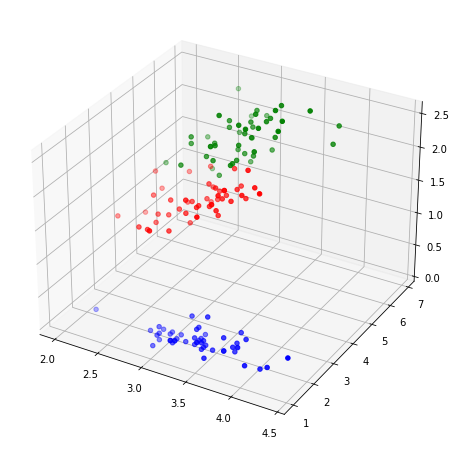

In [73]:
df1 = df.iloc[:, 1:]

class0 = df1[df1['species'] == 0]
class1 = df1[df1['species'] == 1]
class2 = df1[df1['species'] == 2]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class0.iloc[:, 0], class0.iloc[:, 1], class0.iloc[:, 2], c='blue')
ax.scatter(class1.iloc[:, 0], class1.iloc[:, 1], class1.iloc[:, 2], c='red')
ax.scatter(class2.iloc[:, 0], class2.iloc[:, 1], class2.iloc[:, 2], c='green')


U (150, 4)
Vh (4, 4)


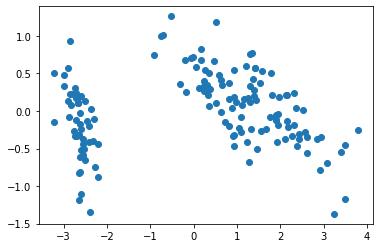

In [77]:
X_svd, U, Sigma, Vh = svd(X_train)

plt.scatter(X_svd[:, 0], X_svd[:, 1])


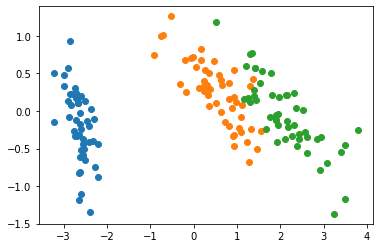

In [105]:
X_mean = np.mean(df.iloc[:, :-1], axis=0)

class0 = df[df['species']==0].iloc[:, :-1]- X_mean
class1 = df[df['species']==1].iloc[:, :-1]- X_mean
class2 = df[df['species']==2].iloc[:, :-1]- X_mean

y0 = class0 @ Vh.T
y1 = class1 @ Vh.T
y2 = class2 @ Vh.T

plt.scatter(y0.iloc[:,0], y0.iloc[:,1])
plt.scatter(y1.iloc[:,0], y1.iloc[:,1])
plt.scatter(y2.iloc[:,0], y2.iloc[:,1])


In [111]:
# centered
dfc = df.iloc[:, :-1] - np.mean(df.iloc[:, :-1], axis=0)

X_pca, eigen_vals, eigen_vecs = pca(dfc)
